In [63]:
from scipy.special import jv
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi
import pandas as pd
import matplotlib as mpl
from floquet_simulations.flux_functions import *
from pathlib import Path
from matplotlib.colors import LinearSegmentedColormap
from floquet_simulations.plot_functions import PlotParams
from floquet_simulations.hamiltonians import ConvertComplex
from scipy.special import jn_zeros

PlotParams(fontsize=10)

In [64]:
omega0 = 8
alpha=1; beta=2
data_dir = Path().absolute().parent.parent/"paper_data"/f"Heff_omega={omega0},alpha={alpha},beta={beta},A3=21,41<A2<42.csv"
df = pd.read_csv(data_dir,
                  index_col=False,
                   converters={"FT-J12": ConvertComplex,
                                  "FT-J23": ConvertComplex,
                                  "FT-J31": ConvertComplex,
                                  # "HE-J12": ConvertComplex,
                                  # "HE-J23": ConvertComplex,
                                  # "HE-J31": ConvertComplex,
                                  # "HE-O1": ConvertComplex,
                                  # "HE-O2": ConvertComplex,
                                  # "HE-O3": ConvertComplex
                   }
                  )


xi_fixed =  np.angle(df["FT-J23"].to_numpy())+np.angle(df["FT-J12"].to_numpy())+np.angle(df["FT-J31"].to_numpy())
xi_fixed = (xi_fixed + 2*pi)%(2*pi)
xi_fixed = np.where(xi_fixed>pi, xi_fixed-2*pi, xi_fixed)
df["xi"] = xi_fixed
df["xi12"]= np.angle(df["FT-J12"].to_numpy())
df["xi23"]= np.angle(df["FT-J23"].to_numpy())
df["xi31"]= np.angle(df["FT-J31"].to_numpy())


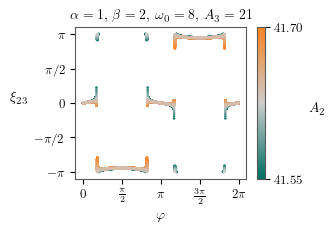

In [65]:
"""
Phases - vary phi
"""
omega0 = 8

cmap = LinearSegmentedColormap.from_list('custom hamiltonians', ['#006F63', "0.8", '#F78320'], N=256)
cm_unit = 1/2.54

A2_min = 41.55
A2_max = 41.7
dfP = df[(df.A2 >A2_min)
         &(df.A2 < A2_max)]
norm = mpl.colors.Normalize(vmin=A2_min, vmax=A2_max)
A3 = 21

fig, ax = plt.subplots(figsize=(7*cm_unit,5*cm_unit))
title = r"$\alpha=1$, $\beta=2$, $\omega_0="+str(omega0)+r"$, $A_3="+str(A3)+r"$"

data = dfP.xi23.to_numpy()
x = dfP["phi3/pi"].to_numpy()*pi
colour = dfP.A2.to_numpy()
# colour = dfP["FT-LowerT.X"]
sc = ax.scatter(x, data, s=3, c=colour, cmap=cmap, marker=".", norm=norm)

ax.set_xticks([0,pi/2, pi, 3*pi/2, 2*pi])
ax.set_xticklabels([ '0',r"$\frac{\pi}{2}$", r"$\pi$", r"$\frac{3\pi}{2}$",  r"$2\pi$"])
ax.set_xlabel(r"$\varphi$")

ax.set_yticks([-pi, -pi/2, 0, pi/2, pi])

ax.set_yticklabels([r"$-\pi$", r"$-\pi/2$", r"$0$", r"$\pi/2$", r"$\pi$"])

ax.set_ylabel(r"$\xi_{23}$", rotation=0, labelpad=12)
# ax.set_ylim([-0.1,1.1])

cbar = plt.colorbar(sc)
cbar.ax.set_ylabel(r"$A_2$", rotation=0, labelpad=10)
cbar.ax.set_yticks([A2_min, A2_max])
# cbar.ax.set_yticklabels(['0', r'$\pi/2$', r'$\pi$', r"$3\pi/2$", r"$2\pi$"])

ax.set_title(title)
# plt.savefig(phasesFigLoc/f"Frame{ii}.png", format='png', bbox_inches='tight')
plt.show()


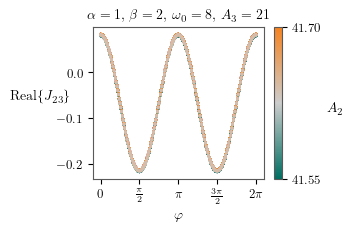

In [66]:
"""
Phases - vary phi
"""
omega0 = 8

cmap = LinearSegmentedColormap.from_list('custom hamiltonians', ['#006F63', "0.8", '#F78320'], N=256)
cm_unit = 1/2.54

A2_min = 41.55
A2_max = 41.7
dfP = df[(df.A2 >A2_min)
         &(df.A2 < A2_max)]
norm = mpl.colors.Normalize(vmin=A2_min, vmax=A2_max)
A3 = 21

fig, ax = plt.subplots(figsize=(7*cm_unit,5*cm_unit))
title = r"$\alpha=1$, $\beta=2$, $\omega_0="+str(omega0)+r"$, $A_3="+str(A3)+r"$"

data = dfP["FT-J23"].to_numpy()
x = dfP["phi3/pi"].to_numpy()*pi
colour = dfP.A2.to_numpy()
# colour = dfP["FT-LowerT.X"]
sc = ax.scatter(x, np.real(data), s=3, c=colour, cmap=cmap, marker=".", norm=norm)

ax.set_xticks([0,pi/2, pi, 3*pi/2, 2*pi])
ax.set_xticklabels([ '0',r"$\frac{\pi}{2}$", r"$\pi$", r"$\frac{3\pi}{2}$",  r"$2\pi$"])
ax.set_xlabel(r"$\varphi$")

# ax.set_yticks([-pi, -pi/2, 0, pi/2, pi])

# ax.set_yticklabels([r"$-\pi$", r"$-\pi/2$", r"$0$", r"$\pi/2$", r"$\pi$"])

ax.set_ylabel(r"$\mathrm{Real}\{J_{23}\}$", rotation=0, labelpad=12)
# ax.set_ylim([-0.1,1.1])

cbar = plt.colorbar(sc)
cbar.ax.set_ylabel(r"$A_2$", rotation=0, labelpad=10)
cbar.ax.set_yticks([A2_min, A2_max])
# cbar.ax.set_yticklabels(['0', r'$\pi/2$', r'$\pi$', r"$3\pi/2$", r"$2\pi$"])

ax.set_title(title)
# plt.savefig(phasesFigLoc/f"Frame{ii}.png", format='png', bbox_inches='tight')
plt.show()


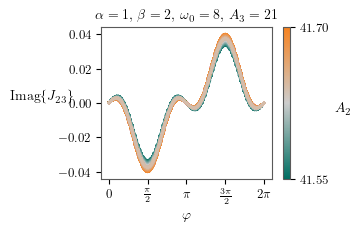

In [67]:
"""
Phases - vary phi
"""
omega0 = 8

cmap = LinearSegmentedColormap.from_list('custom hamiltonians', ['#006F63', "0.8", '#F78320'], N=256)
cm_unit = 1/2.54

A2_min = 41.55
A2_max = 41.7
dfP = df[(df.A2 >A2_min)
         &(df.A2 < A2_max)]
norm = mpl.colors.Normalize(vmin=A2_min, vmax=A2_max)
A3 = 21

fig, ax = plt.subplots(figsize=(7*cm_unit,5*cm_unit))
title = r"$\alpha=1$, $\beta=2$, $\omega_0="+str(omega0)+r"$, $A_3="+str(A3)+r"$"

data = dfP["FT-J23"].to_numpy()
x = dfP["phi3/pi"].to_numpy()*pi
colour = dfP.A2.to_numpy()
# colour = dfP["FT-LowerT.X"]
sc = ax.scatter(x, np.imag(data), s=3, c=colour, cmap=cmap, marker=".", norm=norm)

ax.set_xticks([0,pi/2, pi, 3*pi/2, 2*pi])
ax.set_xticklabels([ '0',r"$\frac{\pi}{2}$", r"$\pi$", r"$\frac{3\pi}{2}$",  r"$2\pi$"])
ax.set_xlabel(r"$\varphi$")

# ax.set_yticks([-pi, -pi/2, 0, pi/2, pi])

# ax.set_yticklabels([r"$-\pi$", r"$-\pi/2$", r"$0$", r"$\pi/2$", r"$\pi$"])

ax.set_ylabel(r"$\mathrm{Imag}\{J_{23}\}$", rotation=0, labelpad=12)
# ax.set_ylim([-0.1,1.1])

cbar = plt.colorbar(sc)
cbar.ax.set_ylabel(r"$A_2$", rotation=0, labelpad=10)
cbar.ax.set_yticks([A2_min, A2_max])
# cbar.ax.set_yticklabels(['0', r'$\pi/2$', r'$\pi$', r"$3\pi/2$", r"$2\pi$"])

ax.set_title(title)
# plt.savefig(phasesFigLoc/f"Frame{ii}.png", format='png', bbox_inches='tight')
plt.show()

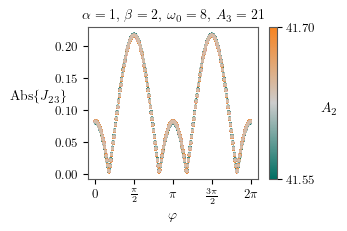

In [68]:
"""
Phases - vary phi
"""
omega0 = 8

cmap = LinearSegmentedColormap.from_list('custom hamiltonians', ['#006F63', "0.8", '#F78320'], N=256)
cm_unit = 1/2.54

A2_min = 41.55
A2_max = 41.7
dfP = df[(df.A2 >A2_min)
         &(df.A2 < A2_max)]
norm = mpl.colors.Normalize(vmin=A2_min, vmax=A2_max)
A3 = 21

fig, ax = plt.subplots(figsize=(7*cm_unit,5*cm_unit))
title = r"$\alpha=1$, $\beta=2$, $\omega_0="+str(omega0)+r"$, $A_3="+str(A3)+r"$"

data = dfP["FT-J23"].to_numpy()
x = dfP["phi3/pi"].to_numpy()*pi
colour = dfP.A2.to_numpy()
# colour = dfP["FT-LowerT.X"]
sc = ax.scatter(x, np.abs(data), s=3, c=colour, cmap=cmap, marker=".", norm=norm)

ax.set_xticks([0,pi/2, pi, 3*pi/2, 2*pi])
ax.set_xticklabels([ '0',r"$\frac{\pi}{2}$", r"$\pi$", r"$\frac{3\pi}{2}$",  r"$2\pi$"])
ax.set_xlabel(r"$\varphi$")

# ax.set_yticks([-pi, -pi/2, 0, pi/2, pi])

# ax.set_yticklabels([r"$-\pi$", r"$-\pi/2$", r"$0$", r"$\pi/2$", r"$\pi$"])

ax.set_ylabel(r"$\mathrm{Abs}\{J_{23}\}$", rotation=0, labelpad=12)
# ax.set_ylim([-0.1,1.1])

cbar = plt.colorbar(sc)
cbar.ax.set_ylabel(r"$A_2$", rotation=0, labelpad=10)
cbar.ax.set_yticks([A2_min, A2_max])
# cbar.ax.set_yticklabels(['0', r'$\pi/2$', r'$\pi$', r"$3\pi/2$", r"$2\pi$"])

ax.set_title(title)
# plt.savefig(phasesFigLoc/f"Frame{ii}.png", format='png', bbox_inches='tight')
plt.show()